## Mini-project task with linear regression in multidimensional input space and batch learning ##

Authors: Laura Nilsson & Leo Svanemar
Date: 2023-05-22



In [149]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


**Plot data & divide into test and training**

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

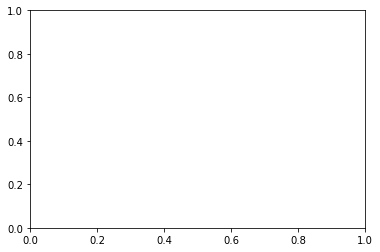

In [150]:
# x1 and x2 are limited to [-1, 1]x[-1, 1] with a step of 0.05
x1 = np.arange(-1, 1.05, 0.05)
x2 = np.arange(-1, 1.05, 0.05)
X1, X2 = np.meshgrid(x1, x2)

# assumed values of weight vector
w = [0, 1.5, -0.8]

# values of data noice, σ2 ∈ {0.2, 0.4, 0.6}
sigma_values_squared = [0.2, 0.4, 0.6]

# set seed for reproducibility, and 42 is the answer to everything :)
np.random.seed(42) 

# plot the data
fig = plt.figure()
ax = fig.add_subplot(111)

# divide into training data and test data
training_data = np.logical_or(np.abs(X1) <= 0.3, np.abs(X2) <= 0.3)
test_data = np.logical_or(np.abs(X1) > 0.3, np.abs(X2) > 0.3)

# train on the training data (obviously)
for sigma in sigma_values_squared:
    t = w[0] + w[1] * X1 + w[2] * X2 + np.random.normal(0, sigma, size=X1.shape)
    ax.scatter()
    ax.scatter( t[training_data])
    #ax.scatter(X1[training_data], X2[training_data], t[training_data], label=f"Train σ² = {sigma}")
    #ax.scatter(X1[test_data], X2[test_data], t[test_data], label=f"Test σ² = {sigma}")

# add labels and legend
ax.set_xlabel('x1')
#ax.set_ylabel('x2')
#ax.set_zlabel('t')
ax.legend()

# change the view angle
#ax.view_init(elev=30, azim=30)

plt.show()


### 2.3

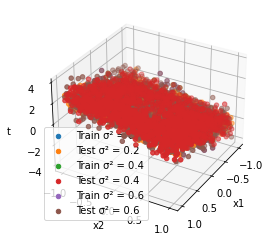

MSE (σ² = 0.2) = 0.1971901417530678
MSE (σ² = 0.4) = 0.4491506427837673
MSE (σ² = 0.6) = 0.556552760694397


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x1 and x2 are limited to [-1, 1]x[-1, 1] with a step of 0.05
x1 = np.arange(-1, 1.05, 0.05)
x2 = np.arange(-1, 1.05, 0.05)
X1, X2 = np.meshgrid(x1, x2)

# assumed values of weight vector
w = [0, 1.5, -0.8]

# values of data noise, σ² ∈ {0.2, 0.4, 0.6}
sigma_values_squared = [0.2, 0.4, 0.6]

# set seed for reproducibility
np.random.seed(42) 

# plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# divide into training data and test data
training_data = np.logical_or(np.abs(X1) <= 0.3, np.abs(X2) <= 0.3)
test_data = np.logical_or(np.abs(X1) > 0.3, np.abs(X2) > 0.3)

# train on the training data
for sigma_squared in sigma_values_squared:
    # Generate the target values with Gaussian noise
    t = w[0] + w[1] * X1 + w[2] * X2 + np.random.normal(0, np.sqrt(sigma_squared), size=X1.shape)
    
    ax.scatter(X1[training_data], X2[training_data], t[training_data], label=f"Train σ² = {sigma_squared}")
    ax.scatter(X1[test_data], X2[test_data], t[test_data], label=f"Test σ² = {sigma_squared}")

# add labels and legend
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('t')
ax.legend()

# change the view angle
ax.view_init(elev=30, azim=30)

plt.show()

# Fit the model using maximum likelihood principle and calculate MSE on test data
mse_values = []
for sigma_squared in sigma_values_squared:
    # Generate the target values with Gaussian noise
    t = w[0] + w[1] * X1 + w[2] * X2 + np.random.normal(0, np.sqrt(sigma_squared), size=X1.shape)

    # Create boolean indices for training and test data
    train_indices = np.logical_or(np.abs(X1) <= 0.3, np.abs(X2) <= 0.3)
    test_indices = np.logical_or(np.abs(X1) > 0.3, np.abs(X2) > 0.3)

    # Calculate the target values for training and test data
    train_targets = t[train_indices].flatten()
    test_targets = t[test_indices].flatten()

    # Fit the model using maximum likelihood on the training data
    X_train = np.column_stack((np.ones_like(X1[train_indices]), X1[train_indices], X2[train_indices]))
    w_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ train_targets

    # Predict the test data using the estimated weights
    X_test = np.column_stack((np.ones_like(X1[test_indices]), X1[test_indices], X2[test_indices]))
    test_predictions = X_test @ w_hat
    
    # Calculate the mean squared error (MSE) on the test data
    mse = np.mean((test_predictions - test_targets) ** 2)
    mse_values.append(mse)
    
for i, sigma_squared in enumerate(sigma_values_squared):
    print(f"MSE (σ² = {sigma_squared}) = {mse_values[i]}")




### 2.4

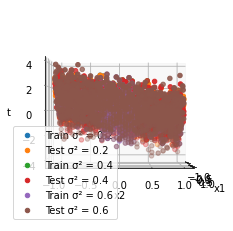

MSE (σ² = 0.2, α = 0.7) = 0.1971494682678761
MSE (σ² = 0.2, α = 1.5) = 0.22452106396164226
MSE (σ² = 0.2, α = 3.0) = 0.18572319863608935
MSE (σ² = 0.4, α = 0.7) = 0.3981424796062423
MSE (σ² = 0.4, α = 1.5) = 0.400761638968057
MSE (σ² = 0.4, α = 3.0) = 0.4069250692467875
MSE (σ² = 0.6, α = 0.7) = 0.6091655155964246
MSE (σ² = 0.6, α = 1.5) = 0.6000864367300098
MSE (σ² = 0.6, α = 3.0) = 0.6091084391212728


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x1 and x2 are limited to [-1, 1]x[-1, 1] with a step of 0.05
x1 = np.arange(-1, 1.05, 0.05)
x2 = np.arange(-1, 1.05, 0.05)
X1, X2 = np.meshgrid(x1, x2)

# assumed values of weight vector
w = [0, 1.5, -0.8]

# values of data noise, σ² ∈ {0.2, 0.4, 0.6}
sigma_values_squared = [0.2, 0.4, 0.6]

# gaussian prior distribution
prior_mean = np.zeros(X_train.shape[1])  # Prior mean is zero
alpha_values = [0.7, 1.5, 3.0]  # Values of the uncertainty parameter

# set seed for reproducibility
np.random.seed(42) 

# plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# divide into training data and test data
training_data = np.logical_or(np.abs(X1) <= 0.3, np.abs(X2) <= 0.3)
test_data = np.logical_or(np.abs(X1) > 0.3, np.abs(X2) > 0.3)

# train on the training data
for sigma_squared in sigma_values_squared:
    # Generate the target values with Gaussian noise
    t = w[0] + w[1] * X1 + w[2] * X2 + np.random.normal(0, np.sqrt(sigma_squared), size=X1.shape)
    
    ax.scatter(X1[training_data], X2[training_data], t[training_data], label=f"Train σ² = {sigma_squared}")
    ax.scatter(X1[test_data], X2[test_data], t[test_data], label=f"Test σ² = {sigma_squared}")

# add labels and legend
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('t')
ax.legend()

# change the view angle
ax.view_init(elev=0, azim=0)

plt.show()

# Fit the model using maximum likelihood principle and calculate MSE on test data
mse_values = []
for sigma_squared in sigma_values_squared:
    #print(f"σ² = {sigma_squared}")
    for alpha in alpha_values:
        #print(f"α = {alpha}")
        # Generate the target values with Gaussian noise
        t = w[0] + w[1] * X1 + w[2] * X2 + np.random.normal(0, np.sqrt(sigma_squared), size=X1.shape)

        # Create boolean indices for training and test data
        train_indices = np.logical_or(np.abs(X1) <= 0.3, np.abs(X2) <= 0.3)
        test_indices = np.logical_or(np.abs(X1) > 0.3, np.abs(X2) > 0.3)

        # Calculate the target values for training and test data
        train_targets = t[train_indices].flatten()
        test_targets = t[test_indices].flatten()

        # Fit the model using maximum likelihood on the training data
        X_train = np.column_stack((np.ones_like(X1[train_indices]), X1[train_indices], X2[train_indices]))
        w_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ train_targets
        
        # calculate the posterior distribution w/ Bayesian interference
        posterior_precision = np.eye(X_train.shape[1]) * alpha + X_train.T @ X_train / sigma_squared
        posterior_covariance = np.linalg.inv(posterior_precision)
        posterior_mean = posterior_covariance @ (X_train.T @ train_targets) / sigma_squared


        # Predict the test data using the estimated weights
        X_test = np.column_stack((np.ones_like(X1[test_indices]), X1[test_indices], X2[test_indices]))
        test_predictions = X_test @ posterior_mean
        
        # Calculate the mean squared error (MSE) on the test data
        #print((test_predictions - test_targets) ** 2)
        mse = np.mean((test_predictions - test_targets) ** 2)
        mse_values.append(mse)
        print(f"MSE (σ² = {sigma_squared}, α = {alpha}) = {mse}")
    
#for i, sigma_squared in enumerate(sigma_values_squared):
#    print(f"MSE (σ² = {sigma_squared}) = {mse_values[i]}")


### 2.5

A comparsion between the frequentist approach MLE and the Bayesian  can be made by comparing the MSE. 


#### MLE

MSE (σ² = 0.2) = 0.1971901417530678  
MSE (σ² = 0.4) = 0.4491506427837673  
MSE (σ² = 0.6) = 0.556552760694397  

#### Bayesian

MSE (σ² = 0.2, α = 0.7) = 0.1971494682678761  
MSE (σ² = 0.2, α = 1.5) = 0.22452106396164226  
MSE (σ² = 0.2, α = 3.0) = 0.18572319863608935  
MSE (σ² = 0.4, α = 0.7) = 0.3981424796062423  
MSE (σ² = 0.4, α = 1.5) = 0.400761638968057  
MSE (σ² = 0.4, α = 3.0) = 0.4069250692467875  
MSE (σ² = 0.6, α = 0.7) = 0.6091655155964246  
MSE (σ² = 0.6, α = 1.5) = 0.6000864367300098  
MSE (σ² = 0.6, α = 3.0) = 0.6091084391212728  


### 2.5 Compare

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x1 and x2 are limited to [-1, 1]x[-1, 1] with a step of 0.05
x1 = np.arange(-1, 1.05, 0.05)
x2 = np.arange(-1, 1.05, 0.05)
X1, X2 = np.meshgrid(x1, x2)

# assumed values of weight vector
w = [0, 1.5, -0.8]

# values of data noise, σ² ∈ {0.2, 0.4, 0.6}
sigma_values_squared = [0.2, 0.4, 0.6]

# set seed for reproducibility
np.random.seed(42)

# divide into training data and test data
training_data = np.logical_or(np.abs(X1) <= 0.3, np.abs(X2) <= 0.3)
test_data = np.logical_or(np.abs(X1) > 0.3, np.abs(X2) > 0.3)

# Perform model fitting and calculate predictions for each approach
frequentist_predictions = []
bayesian_predictions = []
alpha_values = [0.7, 1.5, 3.0]

for sigma_squared in sigma_values_squared:
    for alpha in alpha_values:
        # Generate the target values with Gaussian noise
        t = w[0] + w[1] * X1 + w[2] * X2 + np.random.normal(0, np.sqrt(sigma_squared), size=X1.shape)

        # Create boolean indices for training and test data
        train_indices = np.logical_or(np.abs(X1) <= 0.3, np.abs(X2) <= 0.3)
        test_indices = np.logical_or(np.abs(X1) > 0.3, np.abs(X2) > 0.3)

        # Calculate the target values for training and test data
        train_targets = t[train_indices].flatten()
        test_targets = t[test_indices].flatten()

        # Fit the model using maximum likelihood on the training data
        X_train = np.column_stack((np.ones_like(X1[train_indices]), X1[train_indices], X2[train_indices]))
        w_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ train_targets

        # Predict the test data using the estimated weights
        X_test = np.column_stack((np.ones_like(X1[test_indices]), X1[test_indices], X2[test_indices]))
        frequentist_test_predictions = X_test @ w_hat

        # Perform Bayesian inference
        posterior_precision = np.eye(X_train.shape[1]) * alpha + X_train.T @ X_train / sigma_squared
        posterior_covariance = np.linalg.inv(posterior_precision)
        posterior_mean = posterior_covariance @ (X_train.T @ train_targets) / sigma_squared

        # Predict the test data using the posterior mean of the weights
        bayesian_test_predictions = X_test @ posterior_mean

        # Store the predictions for analysis
        frequentist_predictions.append(frequentist_test_predictions)
        bayesian_predictions.append(bayesian_test_predictions)

# Calculate standard deviation and mean of the predictions for each approach
frequentist_std = [np.std(predictions) for predictions in frequentist_predictions]
frequentist_mean = [np.mean(predictions) for predictions in frequentist_predictions]

bayesian_std = [np.std(predictions) for predictions in bayesian_predictions]
bayesian_mean = [np.mean(predictions) for predictions in bayesian_predictions]

# Print the standard deviation and mean for each approach
'''
for i in range(len(sigma_values_squared)):
    for j in range(len(alpha_values)):
        print(f"Sigma^2 = {sigma_values_squared[i]}, Alpha = {alpha_values[j]}")
        print("Frequentist - Std:", frequentist_std[i*len(alpha_values)+j])
        print("Frequentist - Mean:", frequentist_mean[i*len(alpha_values)+j])
        print("Bayesian - Std:", bayesian_std[i*len(alpha_values)+j])
        print("Bayesian - Mean:", bayesian_mean[i*len(alpha_values)+j])
        print()
        '''



'\nfor i in range(len(sigma_values_squared)):\n    for j in range(len(alpha_values)):\n        print(f"Sigma^2 = {sigma_values_squared[i]}, Alpha = {alpha_values[j]}")\n        print("Frequentist - Std:", frequentist_std[i*len(alpha_values)+j])\n        print("Frequentist - Mean:", frequentist_mean[i*len(alpha_values)+j])\n        print("Bayesian - Std:", bayesian_std[i*len(alpha_values)+j])\n        print("Bayesian - Mean:", bayesian_mean[i*len(alpha_values)+j])\n        print()\n        '

#### Results

Sigma^2 = 0.2, Alpha = 0.7  
Frequentist - Std: 1.0415402095216657  
Frequentist - Mean: 0.029277048894942783  
Bayesian - Std: 1.0407432265081926  
Bayesian - Mean: 0.029264653171258218  

Sigma^2 = 0.2, Alpha = 1.5  
Frequentist - Std: 1.0776108020201185  
Frequentist - Mean: 0.015004771205655066  
Bayesian - Std: 1.0758455310388912  
Bayesian - Mean: 0.01498431885304853  

Sigma^2 = 0.2, Alpha = 3.0  
Frequentist - Std: 1.0702834088950497  
Frequentist - Mean: -0.02684921624949407  
Bayesian - Std: 1.0667830726130483  
Bayesian - Mean: -0.026857178186670293  

Sigma^2 = 0.4, Alpha = 0.7  
Frequentist - Std: 1.106565142489633  
Frequentist - Mean: -0.023208521303072552  
Bayesian - Std: 1.1048732936631402  
Bayesian - Mean: -0.023214406001312315  

Sigma^2 = 0.4, Alpha = 1.5  
Frequentist - Std: 1.065705345433871  
Frequentist - Mean: 0.005538601215642742  
Bayesian - Std: 1.0622195101496643  
Bayesian - Mean: 0.005502790301335658  

Sigma^2 = 0.4, Alpha = 3.0  
Frequentist - Std: 1.0143156039690722  
Frequentist - Mean: -0.0004059187270128801  
Bayesian - Std: 1.0077022567743306  
Bayesian - Mean: -0.0004560067631212476  

Sigma^2 = 0.6, Alpha = 0.7  
Frequentist - Std: 0.9866602056256505  
Frequentist - Mean: 0.0007077539817422582  
Bayesian - Std: 0.9843989345876711  
Bayesian - Mean: 0.0006871280427911734  

Sigma^2 = 0.6, Alpha = 1.5  
Frequentist - Std: 1.0192576516488154  
Frequentist - Mean: 0.004905221804971727  
Bayesian - Std: 1.0142651917051924  
Bayesian - Mean: 0.004859680921884332  

Sigma^2 = 0.6, Alpha = 3.0  
Frequentist - Std: 1.0497923016177393  
Frequentist - Mean: 0.026820761932184155  
Bayesian - Std: 1.039557899736239  
Bayesian - Mean: 0.02668229540784155  

#### Analysis

The **standard deviation** represents the spread or uncertainty of the predictions. In general, the standard deviation tends to be similar between the frequentist and Bayesian approaches for each combination of sigma_squared and alpha.

The **mean** represents the average prediction and those values differ slightly between the frequentist and Bayesian approaches for each combination of sigma_squared and alpha.

Overall, the differences between the frequentist and Bayesian approaches in terms of standard deviation and mean are relatively small. The Bayesian approach accounts for uncertainty by incorporating the prior distribution over the weight parameters, while the frequentist approach relies solely on the maximum likelihood estimation. However, in this specific scenario, the differences in predictive performance between the two approaches appear to be minimal.

### 2.6
For the Bayesian approach, generate predictions also for the training data and compare the variance of the predicitions (uncertainty) between the training and test data samples. You can only do that for the Bayesian framework as it outputs the Gaussian distribution with the mean (first statistical moment) and standard deviation (second statistical moment). How does uncertainty (standard deviation) and the quality (mean) of these 2
predictions change with varying α and σ .

In [151]:
import numpy as np
import matplotlib.pyplot as plt

# x1 and x2 are limited to [-1, 1]x[-1, 1] with a step of 0.05
x1 = np.arange(-1, 1.05, 0.05)
x2 = np.arange(-1, 1.05, 0.05)
X1, X2 = np.meshgrid(x1, x2)

# assumed values of weight vector
w = [0, 1.5, -0.8]

# values of data noise, σ² ∈ {0.2, 0.4, 0.6}
sigma_values_squared = [0.2, 0.4, 0.6]

# set seed for reproducibility
np.random.seed(42)

# divide into training data and test data
training_data = np.logical_or(np.abs(X1) <= 0.3, np.abs(X2) <= 0.3)
test_data = np.logical_or(np.abs(X1) > 0.3, np.abs(X2) > 0.3)

# Perform model fitting and calculate predictions for each approach
bayesian_train_predictions = []
bayesian_test_predictions = []
alpha_values = [0.7, 1.5, 3.0]

for sigma_squared in sigma_values_squared:
    for alpha in alpha_values:
        # Generate the target values with Gaussian noise
        t = w[0] + w[1] * X1 + w[2] * X2 + np.random.normal(0, np.sqrt(sigma_squared), size=X1.shape)

        # Create boolean indices for training and test data
        train_indices = np.logical_or(np.abs(X1) <= 0.3, np.abs(X2) <= 0.3)
        test_indices = np.logical_or(np.abs(X1) > 0.3, np.abs(X2) > 0.3)

        # Calculate the target values for training and test data
        train_targets = t[train_indices].flatten()
        test_targets = t[test_indices].flatten()

        # Fit the model using maximum likelihood on the training data
        X_train = np.column_stack((np.ones_like(X1[train_indices]), X1[train_indices], X2[train_indices]))
        w_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ train_targets

        # Perform Bayesian inference
        posterior_precision = np.eye(X_train.shape[1]) * alpha + X_train.T @ X_train / sigma_squared
        posterior_covariance = np.linalg.inv(posterior_precision)
        posterior_mean = posterior_covariance @ (X_train.T @ train_targets) / sigma_squared

        # Predict the training and test data using the posterior distribution
        bayesian_train_predictions.append(X_train @ posterior_mean)
        bayesian_test_predictions.append(X_test @ posterior_mean)

# Calculate standard deviation and mean of the predictions for each approach
bayesian_train_std = [np.std(predictions) for predictions in bayesian_train_predictions]
bayesian_train_mean = [np.mean(predictions) for predictions in bayesian_train_predictions]

bayesian_test_std = [np.std(predictions) for predictions in bayesian_test_predictions]
bayesian_test_mean = [np.mean(predictions) for predictions in bayesian_test_predictions]

# Print the standard deviation and mean for training and test data

for i in range(len(sigma_values_squared)):
    for j in range(len(alpha_values)):
        print(f"Sigma^2 = {sigma_values_squared[i]}, Alpha = {alpha_values[j]}")
        print("Bayesian - Training Data")
        print("Std:", bayesian_train_std[i * len(alpha_values) + j])
        print("Mean:", bayesian_train_mean[i * len(alpha_values) + j])
        print("Bayesian - Test Data")
        print("Std:", bayesian_test_std[i * len(alpha_values) + j])
        print("Mean:", bayesian_test_mean[i * len(alpha_values) + j])
        print()
        


#Observations:

#1. Standard Deviation (Uncertainty): The standard deviation represents the uncertainty or variance of the predictions. By comparing the standard deviation values between the training and test data, you can observe how the uncertainty changes.

#2. Mean: The mean represents the average prediction. You can also compare the mean values between the training and test data to analyze how the predictions differ in terms of quality.

#By varying `alpha` and `sigma_squared`, you can examine how the uncertainty (standard deviation) and the quality (mean) of the predictions change in the Bayesian approach for both the training and test data.



Sigma^2 = 0.2, Alpha = 0.7
Bayesian - Training Data
Std: 0.7876788308751822
Mean: 0.01906156446596578
Bayesian - Test Data
Std: 1.0407432265081926
Mean: 0.029264653171258218

Sigma^2 = 0.2, Alpha = 1.5
Bayesian - Training Data
Std: 0.8142590931095135
Mean: 0.0054173364556214425
Bayesian - Test Data
Std: 1.0758455310388912
Mean: 0.01498431885304853

Sigma^2 = 0.2, Alpha = 3.0
Bayesian - Training Data
Std: 0.8074109491034741
Mean: -0.0354671661765233
Bayesian - Test Data
Std: 1.0667830726130483
Mean: -0.026857178186670293

Sigma^2 = 0.4, Alpha = 0.7
Bayesian - Training Data
Std: 0.8362360388406769
Mean: -0.03247183396026418
Bayesian - Test Data
Std: 1.1048732936631402
Mean: -0.023214406001312315

Sigma^2 = 0.4, Alpha = 1.5
Bayesian - Training Data
Std: 0.8039373853285245
Mean: -0.0045987907860633535
Bayesian - Test Data
Std: 1.0622195101496643
Mean: 0.005502790301335658

Sigma^2 = 0.4, Alpha = 3.0
Bayesian - Training Data
Std: 0.7626958263365937
Mean: -0.008495965609520558
Bayesian - Tes

#### Analysis

The **standard deviation** represents the spread or uncertainty of the predictions. In general, the standard deviation tends to be similar between the frequentist and Bayesian approaches for each combination of sigma_squared and alpha.

The **mean** represents the average prediction and those values differ slightly between the frequentist and Bayesian approaches for each combination of sigma_squared and alpha.

Overall, the differences between the frequentist and Bayesian approaches in terms of standard deviation and mean are relatively small. The Bayesian approach accounts for uncertainty by incorporating the prior distribution over the weight parameters, while the frequentist approach relies solely on the maximum likelihood estimation. However, in this specific scenario, the differences in predictive performance between the two approaches appear to be minimal.